In [1]:
from audioop import cross
from re import X
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

读取edges

In [2]:
# 第一张表，包含路口的虚拟坐标
data_1 = pd.read_excel('./附件3：长春市9个区交通网络数据和主要小区相关数据.xlsx', header=0, sheet_name=0, usecols=[0, 1, 2])

# 路口编号，路口横坐标，路口纵坐标
cross_list, cross_x, cross_y = list(data_1['节点编号'].values), list(data_1['路口横坐标'].values), list(data_1['路口纵坐标'].values)
cross_pos = [pos for pos in zip(cross_x, cross_y)]

# 第二张表，包含两个路口间的连接情况和距离
data_2 = pd.read_excel('./附件3：长春市9个区交通网络数据和主要小区相关数据.xlsx', header=0, sheet_name=1, usecols=[1, 2, 3])

# 路线起点， 路线终点， 路线距离
start, end, length = list(data_2['路线起点'].values), list(data_2['路线终点'].values), list(data_2['路线距离(m)'].values)
edges = [z for z in zip(start, end)]

读取小区位置和配送点位置

In [3]:
# 小区坐标和所属的配送点
data_3 = pd.read_excel('./配送点和管理小区汇总.xlsx', sheet_name=0, usecols=['小区横坐标', '小区纵坐标', '配送点序号']).values
data_3

array([[57.9 , 62.13, 56.  ],
       [51.79, 61.61, 15.  ],
       [54.8 , 54.88, 62.  ],
       ...,
       [26.07, 36.63, 25.  ],
       [33.63, 36.87, 14.  ],
       [45.32, 42.28, 18.  ]])

In [4]:
# 配送点坐标
data_4 = pd.read_excel('./配送点和管理小区汇总.xlsx', sheet_name=1)
data_4

,配送点x,配送点y
0,57.92,30.32
1,43.27,49.55
2,68.41,57.74
3,30.39,28.54
4,79.86,23.66
...,...,...
74,85.52,18.26
75,48.52,31.51
76,38.59,53.44
77,58.33,50.82


In [5]:
roads = nx.Graph()
# 十字路口节点坐标
c_pos = dict(zip(cross_list, cross_pos))
pos={}
pos=c_pos.copy()

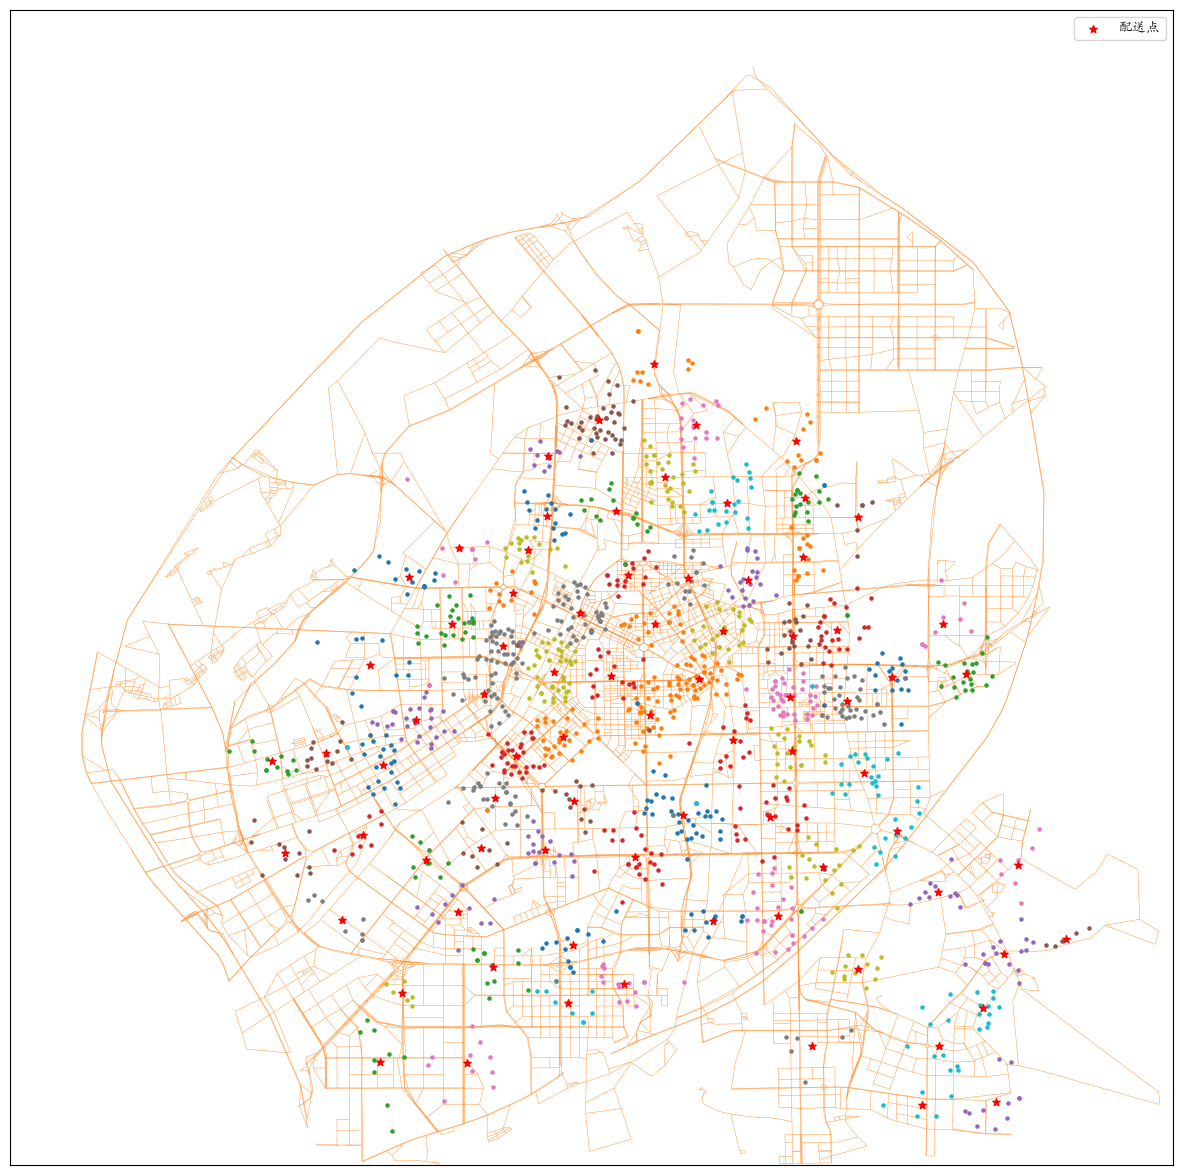

In [26]:
K = 79
plt.figure(figsize=(15, 15))
# plt.title('长春市小区聚类效果图', fontsize=17)
plt.xlim(0, 100)
plt.ylim(0, 100)
nx.draw_networkx_edges(roads, pos, edges, width=0.3, edge_color='#FF8A23')
for i in range(K):
    index, _ = np.where(data_3 == i)
    plt.scatter(data_3[index, 0], data_3[index, 1], s=5)

plt.scatter(data_4['配送点x'], data_4['配送点y'], marker='*', s=30, c='r', label='配送点')
plt.legend()
plt.savefig('images\问题2_叠加图.png')
plt.show()